# 📘 Credit Risk Classification Model — Machine Learning Project

This project aims to build a machine learning model...


## Step 1: Import Required Libraries and Load Dataset
We start by importing all necessary libraries.


In [127]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn.ensemble import RandomForestClassifier

## 🗂️ Step 2: Initial Data Exploration
Here we inspect the dataset structure...


In [128]:
df = pd.read_csv("Data.csv")

In [129]:
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [130]:
df.shape

(30000, 16)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       27992 non-null  float64
 4   BILL_AMT2       27494 non-null  float64
 5   BILL_AMT3       27130 non-null  float64
 6   BILL_AMT4       26805 non-null  float64
 7   BILL_AMT5       26494 non-null  float64
 8   BILL_AMT6       25980 non-null  float64
 9   PAY_AMT1        24751 non-null  float64
 10  PAY_AMT2        24604 non-null  float64
 11  PAY_AMT3        24032 non-null  float64
 12  PAY_AMT4        23592 non-null  float64
 13  PAY_AMT5        23297 non-null  float64
 14  PAY_AMT6        22827 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


In [132]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,30000.0,NaN,NaN,NaN,10666.6607,9698.091793,1.0,1850.5,7483.5,18746.25,29999.0
LIMIT_BAL,30000.0,NaN,NaN,NaN,14.648867,189.496507,1.0,4.0,9.0,21.0,32768.0
AGE,30000.0,NaN,NaN,NaN,32.4279,12.718991,3.0,26.0,33.0,41.0,79.0
BILL_AMT1,27992.0,NaN,NaN,NaN,33989.49457,61569.150299,-154973.0,1574.0,8551.5,38251.75,964511.0
BILL_AMT2,27494.0,NaN,NaN,NaN,33938.750418,60904.557498,-69777.0,1556.0,8697.5,38605.5,983931.0
BILL_AMT3,27130.0,NaN,NaN,NaN,32617.867011,58654.145088,-157264.0,1534.0,8889.5,36534.25,693131.0
BILL_AMT4,26805.0,NaN,NaN,NaN,30709.50416,54827.113904,-81334.0,1433.0,8671.0,32855.0,891586.0
BILL_AMT5,26494.0,NaN,NaN,NaN,29015.123424,51729.302253,-81334.0,1327.0,8131.5,29680.5,927171.0
BILL_AMT6,25980.0,NaN,NaN,NaN,28526.276559,51625.82198,-94625.0,1261.0,7819.0,29459.75,961664.0
PAY_AMT1,24751.0,NaN,NaN,NaN,2613.957537,12548.633278,1.0,15.0,166.0,1667.0,873552.0


## 🟦 4. Missing Values

In [133]:
df.isnull().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

In [134]:
print(df['Default Status'].value_counts(normalize=True))  # Imbalanced: 78% Not Default

Default Status
Not Default    0.7788
Default        0.2212
Name: proportion, dtype: float64


In [135]:
df= df.drop(['ID'],axis=1)


## Step 5: Exploratory Data Analysis (EDA)


In [136]:
df['BILL_AMT1'] = df['BILL_AMT1'].fillna(df['BILL_AMT1'].median())
df['BILL_AMT2'] = df['BILL_AMT2'].fillna(df['BILL_AMT2'].median())
df['BILL_AMT2'] = df['BILL_AMT2'].fillna(df['BILL_AMT2'].median())

In [137]:
i = df.select_dtypes(include=[np.number]).columns
df[i]=df[i].fillna(df[i].median())

In [138]:
df.isnull().sum()

LIMIT_BAL         0
AGE               0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Status    0
dtype: int64

## 🟦 6. EDA

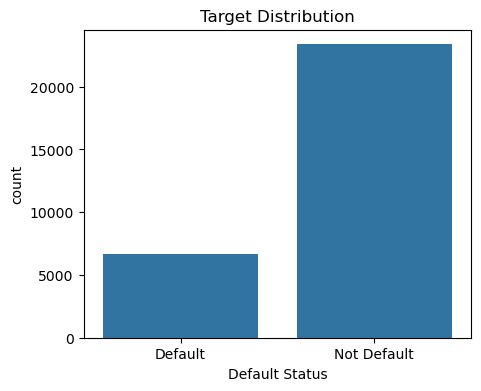

In [139]:
plt.figure(figsize=(5,4))
sns.countplot(x='Default Status', data= df)
plt.title("Target Distribution")
plt.savefig("DefaultvsTD")
plt.show()

### 📌 Insights from Target Variable Distribution

- The dataset is **highly imbalanced**.
- About **78–80% of customers are ‘Not Default’**, while only **20–22% customers are ‘Default’**.
- This imbalance can cause ML models to become biased toward the majority class.
- Therefore, evaluation metrics like **recall, precision, ROC-AUC**, and techniques like **class weighting or SMOTE** may be needed to improve model fairness.


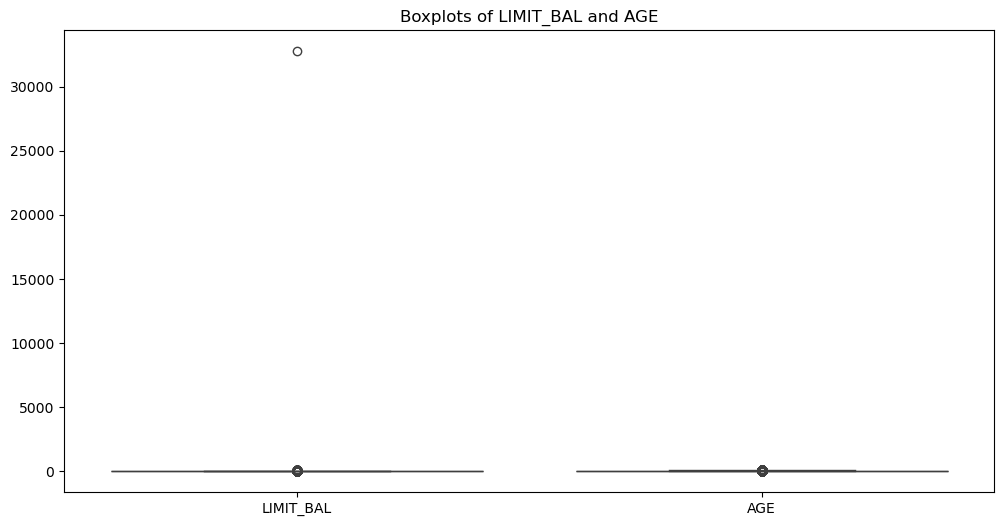

In [140]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["LIMIT_BAL", "AGE"]])
plt.title("Boxplots of LIMIT_BAL and AGE")
plt.savefig("LIM_BALvsAGE")
plt.show()


### 📌 Insights from Boxplots of LIMIT_BAL and AGE

- `LIMIT_BAL` has several **extreme outliers**, meaning some customers have exceptionally high credit limits.
- AGE is more stable with fewer outliers and a tighter distribution.
- The large spread of credit limits suggests customers come from **diverse financial backgrounds**.
- Outliers in LIMIT_BAL may need to be handled depending on the model type, especially for algorithms sensitive to scale.


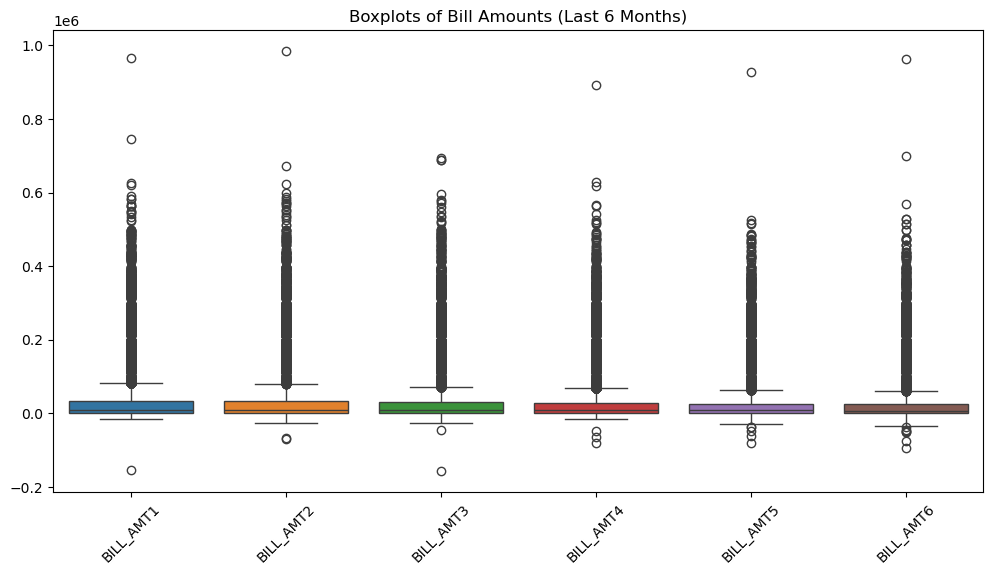

In [141]:
bill_cols = ["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]

plt.figure(figsize=(12,6))
sns.boxplot(data=df[bill_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Bill Amounts (Last 6 Months)")
plt.savefig("Bill Amounts (Last 6 Months)")
plt.show()


### 📌 Insights from Boxplots of Bill Amounts (Last 6 Months)

- The bill amounts for all 6 months show a **very similar distribution**, indicating customers have consistent spending/repayment patterns month to month.
- There are **large numbers of outliers** on the higher end, meaning a small group of customers have extremely high outstanding bills.
- Most values are concentrated near the lower range, showing **highly skewed distributions**.
- The presence of extreme values suggests:
  - strong variability in customer financial behavior,
  - need for careful feature scaling,
  - potential improvement from log transformation or outlier handling.


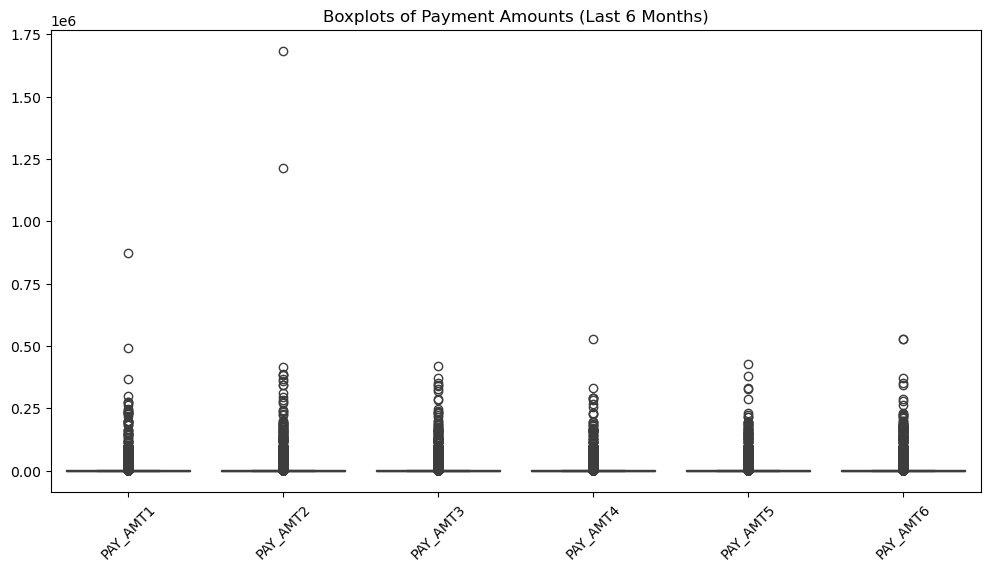

In [142]:
pay_cols = ["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]

plt.figure(figsize=(12,6))
sns.boxplot(data=df[pay_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Payment Amounts (Last 6 Months)")
plt.savefig("Payment Amounts (Last 6 Months)")
plt.show()


### 📌 Insights from Boxplots of Payment Amounts (Last 6 Months)

- Payment amounts are extremely skewed, with many customers making very small or zero payments.
- A few customers make **very large payments**, visible as extreme outliers.
- This indicates a high variability in repayment behavior.
- These features are likely to be **strong predictors of default**, because repayment patterns reflect financial stability.


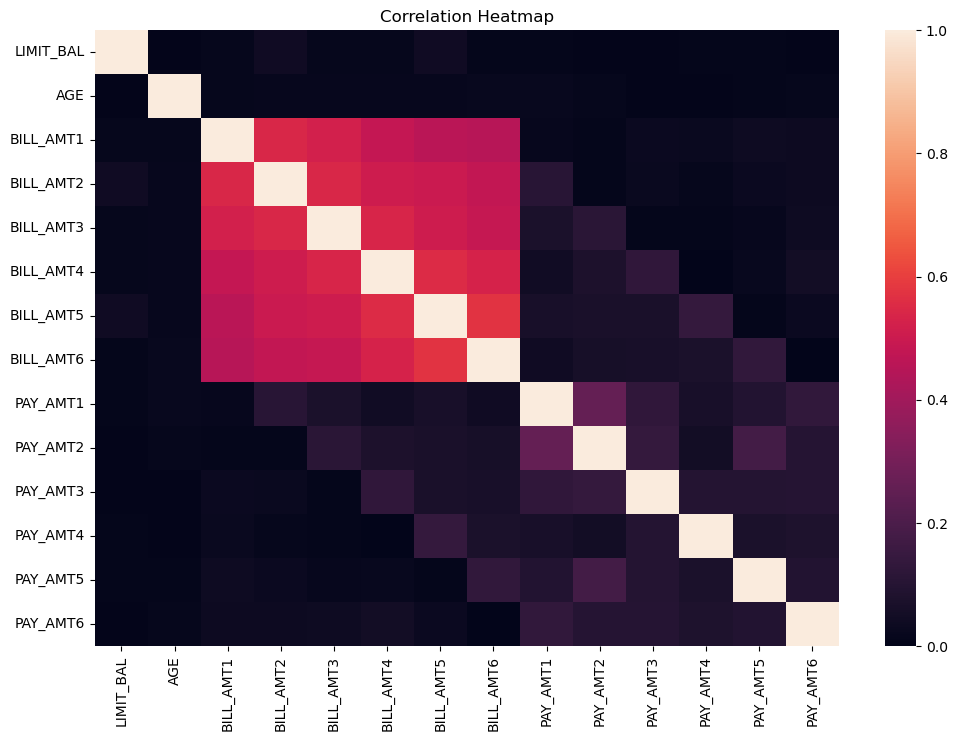

In [143]:

df_corr = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), annot=False)
plt.title("Correlation Heatmap")

plt.savefig("correlation_heatmap.png")
plt.show()


### 📌 Insights from Correlation Heatmap

- Bill amounts (`BILL_AMT1`–`BILL_AMT6`) are **highly correlated with each other**, which is expected because customers with high spending tend to stay high across months.
- Payment amounts (`PAY_AMT1`–`PAY_AMT6`) also show moderate correlation among themselves.
- Bill amounts and payment amounts show **weak positive correlations**, indicating customers who have higher bills tend to make higher payments.
- `LIMIT_BAL` (credit limit) shows a weak correlation with default, meaning credit limit alone is not a strong predictor.
- `AGE` has almost no meaningful correlation with default.
- These correlations suggest that models with **tree-based algorithms (like Random Forest)** handle the data structure better than linear models.


## 🟦 7. Feature Engineering

In [144]:
df["Default_Flag"] = df["Default Status"].map({"Not Default": 0, "Default": 1})

In [145]:
X = df.drop(columns=["Default Status", "Default_Flag"])
y = df["Default_Flag"]

## 🟦 8. Train-Test Split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [147]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🟦 9. Model Building

In [148]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:,1]

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000

ROC AUC: 0.6017783057152547


C:\Users\Krish Pandya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Krish Pandya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Krish Pandya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


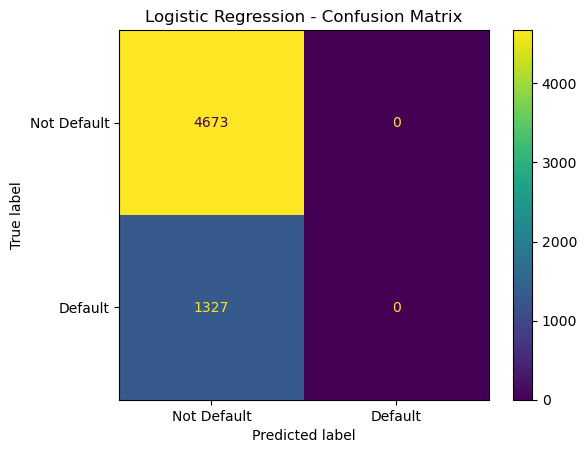

In [149]:
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Default", "Default"])
disp.plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.savefig("Confusion Matrix")
plt.show()

### 📌 Insights from Logistic Regression Confusion Matrix

- Logistic Regression failed to correctly identify any `Default` cases.
- The model predicted **all** samples as `Not Default`.
- This happens because:
  - The dataset is **imbalanced**, and the model is biased toward the majority class.
  - Logistic Regression is too simple to capture the patterns needed to distinguish defaulters.
- As a result:
  - Recall for the `Default` class = **0**
  - Precision for the `Default` class = **0**
- More powerful models like **Random Forest, XGBoost** or class-imbalance correction techniques are required.


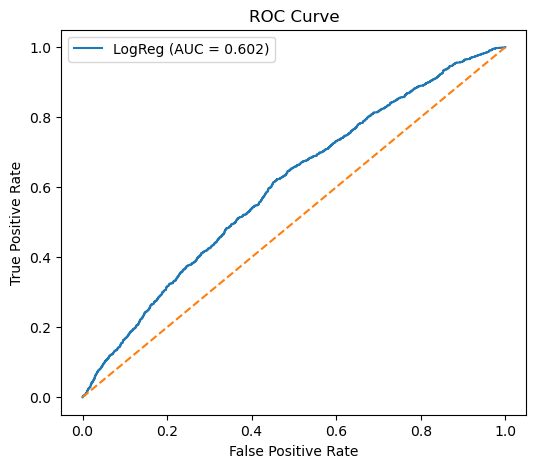

In [153]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"LogReg (AUC = {roc_auc_score(y_test, y_proba_lr):.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("ROC Curve")
plt.show()


### 📌 Insights from ROC Curve (Logistic Regression)

- Logistic Regression reached an **AUC of ~0.60**, which is only slightly better than random guessing (0.50).
- This confirms that Logistic Regression **is not capturing the complexity** in the data.
- The weak performance is also caused by the **class imbalance**, where very few default cases exist.
- More advanced models like Random Forest or Gradient Boosting are expected to perform much better.


In [151]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"  # handle class imbalance a bit
)

rf.fit(X_train, y_train)  # tree models don't need scaling

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      4673
           1       0.53      0.09      0.16      1327

    accuracy                           0.78      6000
   macro avg       0.66      0.53      0.52      6000
weighted avg       0.73      0.78      0.72      6000

ROC AUC: 0.6750548413330536
